(plotting:section)=
# Plot Data on a Map

This notebook is to serve as a manual on how to plot the SAR data. This can be done in numerous ways, but in the following some spesific examples are presented. These functions rely heavily on the use of the python libraries cartopy and xarray, along with some other packages. Thefore, the first thing to do is to ensure is that the required packages are installed and imported:

In [1]:
# Import the required packages:

import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Next up is to select the dataset which contain the data that is to be plotted:

In [2]:
# Open a dataset using its OPENDAP-url 
# (file from 2012-01-27T21:50:05)

ds = xr.open_dataset('''https://thredds.met.no/thredds/dodsC/
remotesensingenvisat/asar-doppler/2012/01/27/
ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc''')

ds

<xarray.Dataset> Size: 45MB
Dimensions:                   (y: 602, x: 851, zero_doppler_time: 602)
Coordinates:
  * zero_doppler_time         (zero_doppler_time) datetime64[ns] 5kB 2012-01-...
Dimensions without coordinates: y, x
Data variables: (12/23)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswath_number           (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
    crs                       int32 4B ...
Attributes: (12/60)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    time_coverage_end:          2012-01-27T21:51:07.925870+00:00
    time_coverage_start:        2012-01-27T21:50:04.077748+00:00
    title:                      Calibrated geophysical ENVISAT ASAR wide-swat...
    title_lang:                 en
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

The netCDF file format combined with the xarray python library makes it easy to plot different variables. The example below is arguably the easiest and most efficient way of plotting a variable from an opened xarray.Dataset. The metadata of the dataset in question is used to provide axis- and colorbar labels.

<br />

In the following example the variable "sigma0" from the xarray.Dataset defined as ds is plotted by simply using .plot(). Here the axis labels are automatically named "x" and "y" as these are the dimensions of "sigma0". From the "Data variables" of the xarray.Dataset (see the interactive menu above), both the "standard_name" and the "units" (in square brackets) of the plotted variable "sigma0" are also automatically added as the colorbar label. 

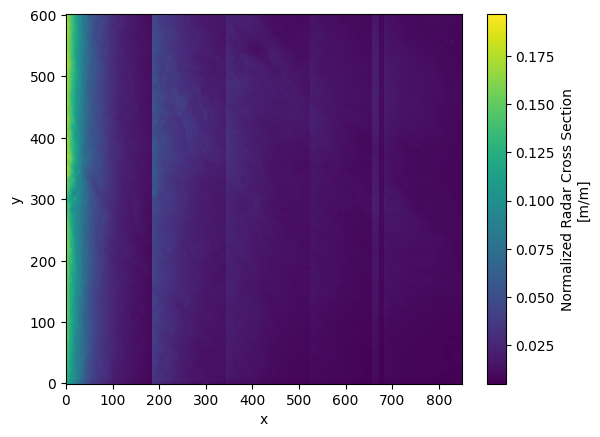

In [3]:
# Plotting a selected variable from the dataset opened above:

ds.sigma0.plot()
plt.show()

Below is a code snippet which easily extracts the wanted files from "Downloads" (given a recognicable part of the filenames) meant for extracting files which have been downloaded. This can be used when files have been dowloaded from i.e. [data.met.no](https://data.met.no/metsis/search), see the [Visualize Data with WMS](visualize:data:WMS) section on the [Sar Dataset Accessibility](accessibility:page) page.

In [4]:
### Opens Downloaded file
# ds_arctic = xr.open_dataset('''ASA_WSDV2PRNMI20120127_215005
# _000612433111_00101_51839_0000
# .nc''')
''' Downloaded file found in the notebook folder '''


### Get the path of the home directory
home_dir = os.path.expanduser("~")

#### Use os.path.join to combine paths
path2files = os.path.join(home_dir, "Downloads")
''' "Downloads" --> alternatively just change to 
    the path of the downloaded files from the home directory'''

### Specify something to recognice the desired nc-files, 
  # extract them and put them in a list
desired_files_paths = glob.glob(os.path.join(path2files, "ASA_*.nc"))  
''' Where "ASA_*.nc" is 
    "filename_starts_with_str*filename_ends_with" '''


# Open the first dataset
ds = xr.open_dataset(desired_files_paths[0])

# Interactive overview of the dataset 
# - when opened as a jupyter notebook or a jupyter book
ds

<xarray.Dataset> Size: 45MB
Dimensions:                   (y: 602, x: 851, zero_doppler_time: 602)
Coordinates:
  * zero_doppler_time         (zero_doppler_time) datetime64[ns] 5kB 2012-01-...
Dimensions without coordinates: y, x
Data variables: (12/23)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswath_number           (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
    crs                       int32 4B ...
Attributes: (12/60)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    time_coverage_end:          2012-01-27T21:51:07.925870+00:00
    time_coverage_start:        2012-01-27T21:50:04.077748+00:00
    title:                      Calibrated geophysical ENVISAT ASAR wide-swat...
    title_lang:                 en
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

<br />
<br />

## Plotting Function

Below is an easy to use plotting function which visualize your desired data variable on a map. This function relies heavily on the python library cartopy, along several other packages that are imported on the very begining of this [Plot Data on a Map](plotting:section) section. There is also possible to set the spatial extent of the plot yourself - default is just plotting the spatial extent of the variable itself as defined in the metadata.

In [5]:
def plotting_variables_on_a_map( 
variable, 
number_of_colorbar_intervals = 100, 
lat_min = ds.geospatial_lat_min, lat_max = ds.geospatial_lat_max, 
lon_min = ds.geospatial_lon_min, lon_max = ds.geospatial_lon_max,
fractional_title_spacing = 0.05,
title_fontsize = 15,
cbar_label_fontsize = 12):

    ### Create a linear space for latitude and longitude
    lat = np.linspace(ds.geospatial_lat_min, 
                      ds.geospatial_lat_max, 
                      ds.sizes['y'])
    
    lon = np.linspace(ds.geospatial_lon_min, 
                      ds.geospatial_lon_max, 
                      ds.sizes['x'])

    ### Create a new xarray DataArray with latitude and longitude 
      # as coordinates
    variable_with_coords = xr.DataArray(
                        variable.values,
                        coords=[('lat', lat), ('lon', lon)],
                        dims=['y', 'x'])

    ### Assign variable attributes from the original DataArray
    variable_with_coords.attrs = variable.attrs

    ### Now select your slice - defined by the latitudinal 
      # and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(
        x=slice(ds.geospatial_lon_min, ds.geospatial_lon_max), 
        y=slice(ds.geospatial_lat_min, ds.geospatial_lat_max))


    #### Ready to plot the variable on a map using subplot package 
       # of matplotlib.pyplot
       # Create the main plot and set the projection
    fig, ax = plt.subplots(
                1,
                figsize=(16, 12),
                subplot_kw={'projection': ccrs.PlateCarree()})
    
    ax.axis('off')   # Turn off axes
    ax.coastlines()  # Add coastlines


    ### Create the gridlines and configure the labels
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = True # Default     - Include bottom labels
    gl.left_labels = True   # Default     - Include LH side labels
    gl.top_labels = True    # Default     - Include top labels
    gl.right_labels = False # Not default - Exclude RH side labels

    ### Defining var_min, var_max and var_step 
      # using the variable attribute minmax 
      # to extract var_min and var_max
    var_min = int(plotable_variable.minmax.split(' ')[0])
    var_max = int(plotable_variable.minmax.split(' ')[1])
    
    ### Defining the colorbar intervals based on desired 
      # number of colorbars
    var_step = ((var_max - var_min)/number_of_colorbar_intervals)

    ### Redefining the max val to improve visuals of colorbar
      #  around center
    var_max=int(plotable_variable.minmax.split(' ')[1])+var_step

    ### Add features for land and ocean
    ax.add_feature(cfeature.LAND, facecolor='tan', zorder=2)
    ''' Tan color for land
        - Placed third in line for plotting '''

    ax.add_feature(cfeature.OCEAN, facecolor='grey', zorder=0)
    ''' Grey color for ocean 
        - Placed first in line for plotting '''
    
    ### Plot the data
    cax = plotable_variable.plot.contourf(
        ax=ax, x='x', y='y',
        extend='neither',
        norm=TwoSlopeNorm(vmin=var_min, 
                          vcenter=0, 
                          vmax=var_max),
        levels=np.arange(var_min, var_max, var_step),
        add_colorbar=False,  # Do not automatically add colorbar
        zorder = 1
        )

    ### Create and inset axes for the colorbar
    cbar_ax = inset_axes(
        ax,
        width="5%",  # width = 5% of parent_bbox width
        height="100%",  # height : 100% of parent_bbox height
        loc='lower left',
        bbox_to_anchor=(1.05, 0., 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
        )

    ### Create colorbar
    cbar = fig.colorbar(cax, 
                        cax=cbar_ax, 
                        orientation='vertical')
    
    ### Extract units from the plotted variable to use as
      #  label for colorbar
    cbar.set_label(f'[{plotable_variable.units}]', 
                   fontsize = cbar_label_fontsize)

    # Set and adjust title
    mid_lat = (lat_min + lat_max) / 2
    mid_lon = (lon_min + lon_max) / 2
    ax.text(
        mid_lon, 
        lat_max+((lat_max - lat_min)*fractional_title_spacing),
          f'{plotable_variable.long_name}',
            fontsize=title_fontsize,
              ha='center')

    # Setting the extent on the map that is plotted
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlim(lon_min, lon_max)

    plt.show()

    return

<br />

## Plotting Examples

In the following, some examples on how to utilize the plotting function above (and their results) is shown. 

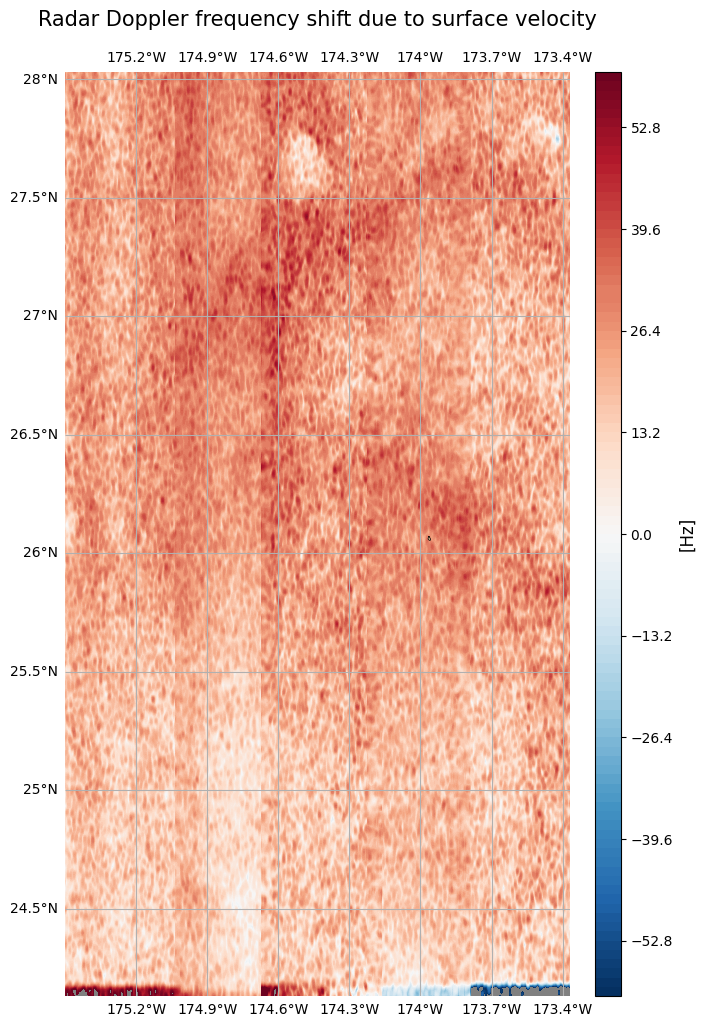

In [6]:
### Plotting the desired variable within its geographical extent 
  # - By default using the metadata for the geographical extent 
  # as lat/lon min/max values.

### Plotting geophysical_doppler
plotting_variables_on_a_map(
    variable = ds.geophysical_doppler,
    number_of_colorbar_intervals = 100,  # Default value
    title_fontsize = 15,                 # Default value
    cbar_label_fontsize = 12             # Default value
    )

<br />

Then, some examples on how to alter the spatial extent of the map at which the selected variable is plotted on (three examples showing Hawaii in the middle of the Pacific Ocean):

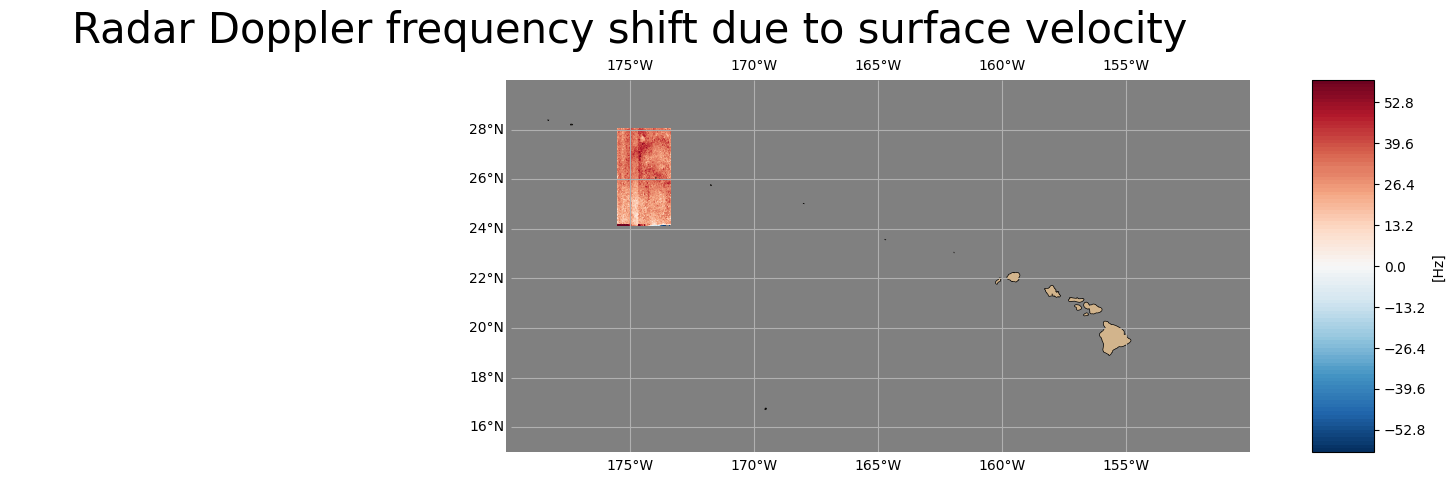

In [7]:
### Plotting geophysical_doppler
plotting_variables_on_a_map(
    variable = ds.geophysical_doppler, 
    lat_min = 15, lat_max = 30,
    lon_min = -200, lon_max = -150,
    number_of_colorbar_intervals = 100,  # Default value
    fractional_title_spacing = 0.10,     # Default 0.05
    title_fontsize = 30,                 # Default value
    cbar_label_fontsize = 10             # Default 12
    )

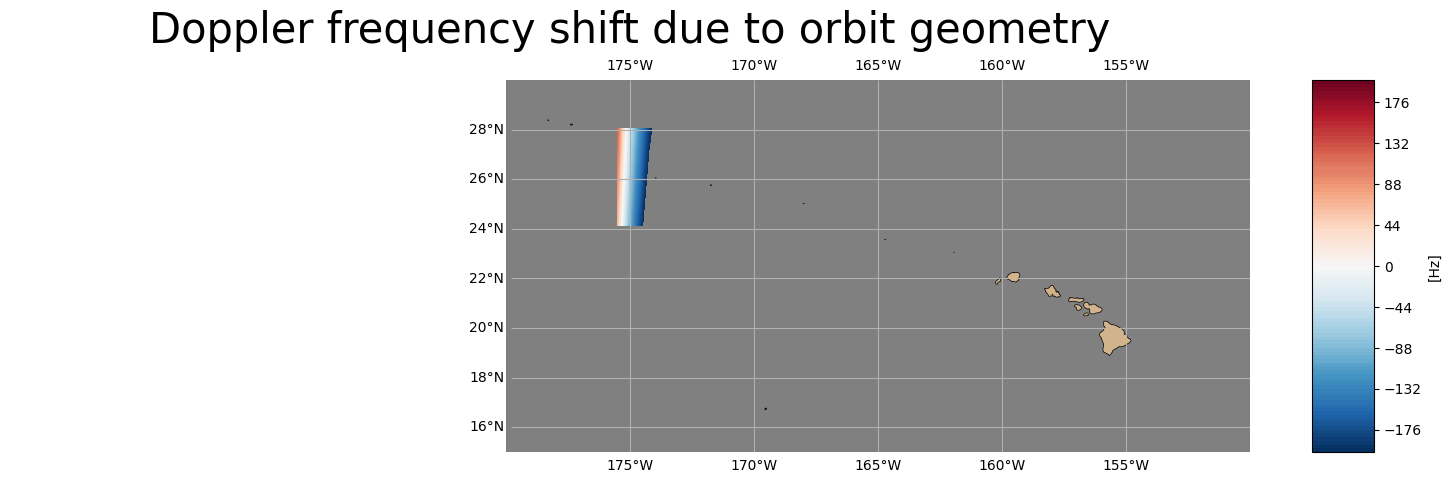

In [8]:
### Plotting geometric_doppler 
plotting_variables_on_a_map(
    variable = ds.geometric_doppler, 
    # lat_min = 20, lat_max = 50,
    # lon_min = -85, lon_max = -65 
    lat_min = 15, lat_max = 30,
    lon_min = -200, lon_max = -150,
    number_of_colorbar_intervals = 100,  # Default value
    fractional_title_spacing = 0.10,     # Default 0.05
    title_fontsize = 30,                 # Default value
    cbar_label_fontsize = 10             # Default 12
    )

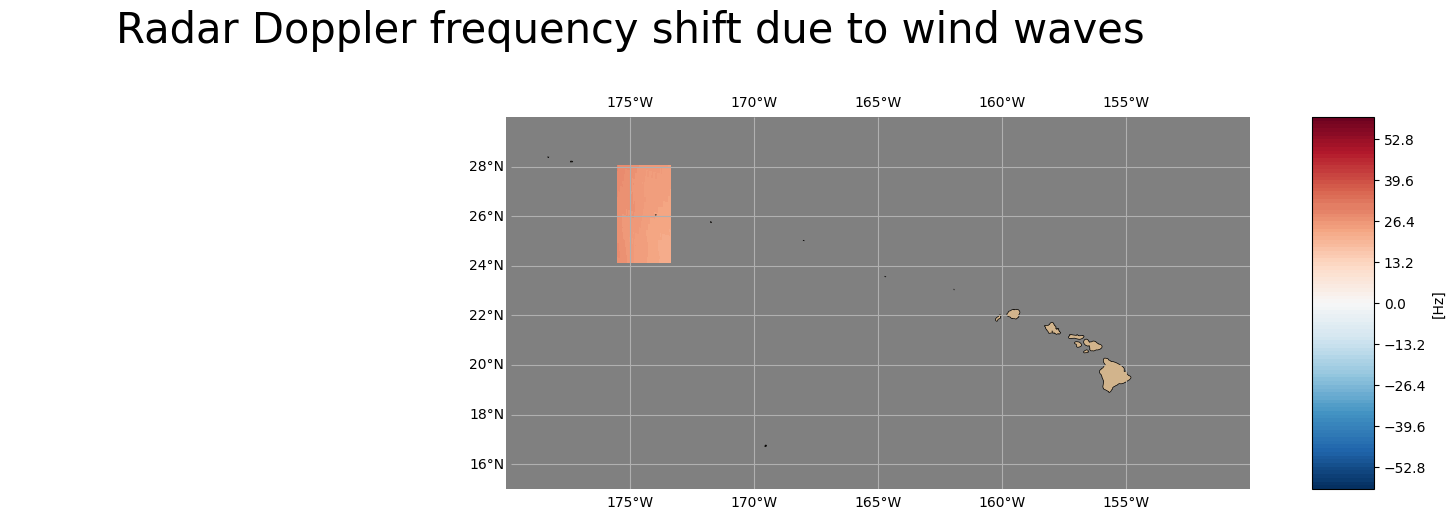

In [9]:
### Plotting wind_waves_doppler
plotting_variables_on_a_map(
    variable = ds.wind_waves_doppler,
    lat_min = 15, lat_max = 30,
    lon_min = -200, lon_max = -150,
    number_of_colorbar_intervals = 100,  # Default value
    fractional_title_spacing = 0.20,     # Default 0.05
    title_fontsize = 30,                 # Default value
    cbar_label_fontsize = 10             # Default 12
    )


<br />

And finally, some data variable plotted on (half of) the world map:

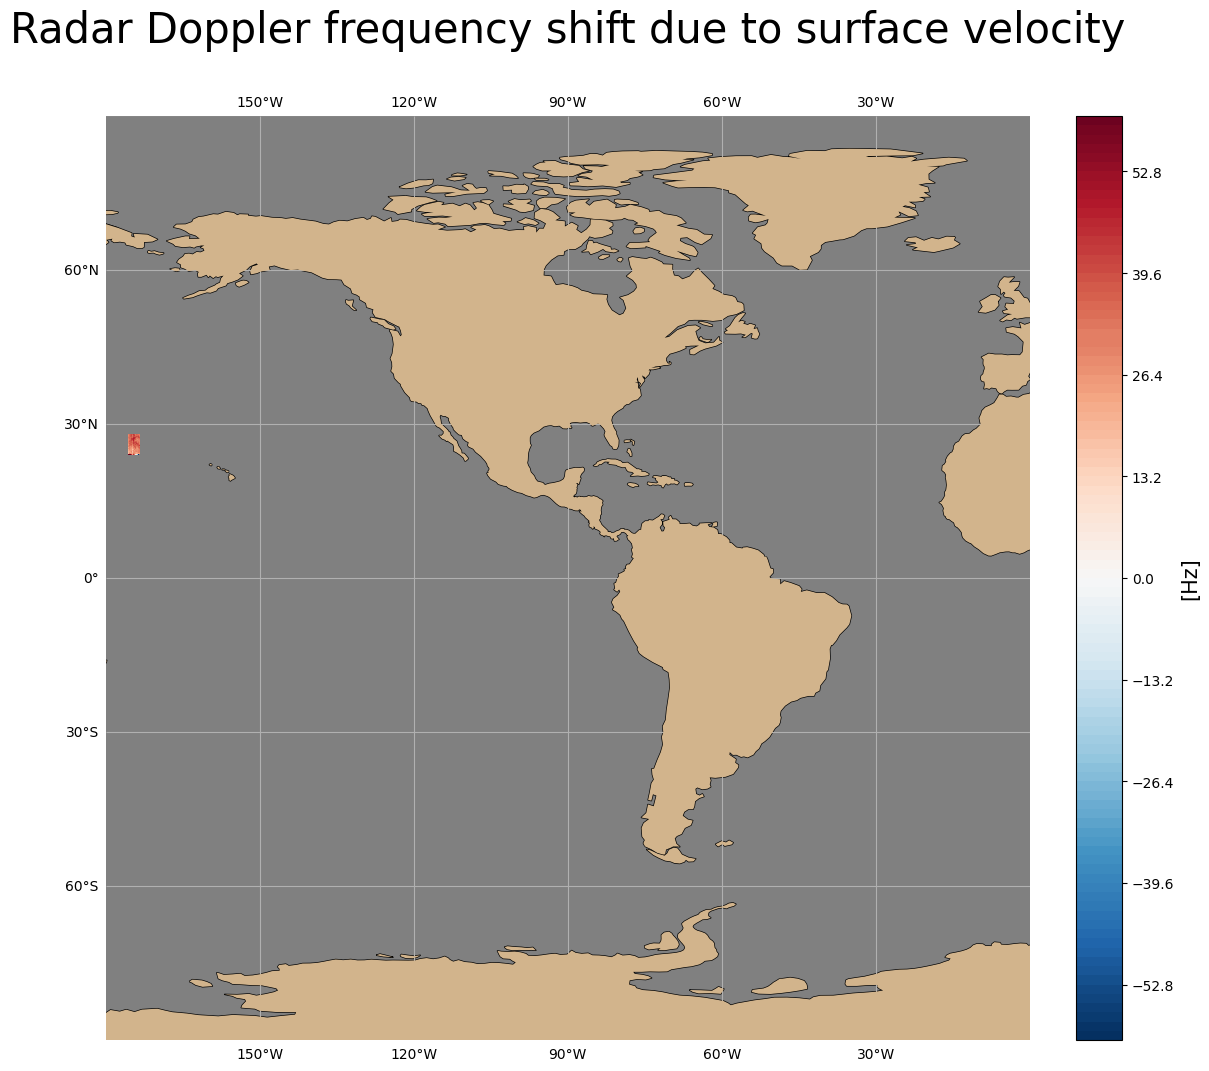

In [10]:
### Plotting geophysical_doppler
plotting_variables_on_a_map(
    variable = ds.geophysical_doppler, 
    lat_min = -90, lat_max = 90,
    lon_min = -180, lon_max = 0, 
    number_of_colorbar_intervals = 100,  # Default value
    fractional_title_spacing = 0.08,     # Default 0.05
    title_fontsize = 30,                 # Default 15
    cbar_label_fontsize = 15             # Default 12
    )

<br />

## Plotting with a Polar Projection

As the SAR Doppler data is a great asset when researching areas at high latitudes, there is also provided an additional example function which extracts and plots desired variables on a map with an Arctic projection. Again the python library cartopy is utilized. 

In [11]:
def ArcticPlot_variables_on_a_map(dataset, 
                                variable,
                                map_color,
                                map_start_longitude = -180,
                                map_end_longitude = 180,
                                map_edge_latitude = 60,
                                map_center_latitude = 90,
                                title_fontsize = 15,
                                log_scale_option = False):

    # Create a linear space for latitude and longitude
    lat = np.linspace(dataset.geospatial_lat_min, 
                      dataset.geospatial_lat_max, 
                      dataset.sizes['y'])
    
    lon = np.linspace(dataset.geospatial_lon_min, 
                      dataset.geospatial_lon_max, 
                      dataset.sizes['x'])

    ### Create a new xarray DataArray with 
      # latitude and longitude as coordinates
    if log_scale_option == True:
        variable_with_coords = xr.DataArray(
                        np.log10(variable.values)*10,
                        coords=[('lat', lat), ('lon', lon)], 
                        dims=['y', 'x'])
        '''converting the linear backscatter values to dB (decibel)''' 
        
    else:
        variable_with_coords = xr.DataArray(
                                variable.values, 
                                coords=[('lat', lat), ('lon', lon)],
                                dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    ### Now select your slice - defined by the latitudinal 
      # and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(
        x=slice(dataset.geospatial_lon_min, 
                dataset.geospatial_lon_max), 
        y=slice(dataset.geospatial_lat_min, 
                dataset.geospatial_lat_max))

    fig, ax = plt.subplots(1, figsize=(10, 6))
    fig.suptitle(f'{variable.long_name}', 
                 fontsize = title_fontsize)
    ax.axis('off')   # Turn off axis

    # Set the projection - NorthPolarStereo
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.coastlines()   # Adding coastlines
    ax.set_extent([map_start_longitude, 
                   map_end_longitude, 
                   map_edge_latitude, 
                   map_center_latitude], 
                   crs=ccrs.PlateCarree())

    # Add features for land and ocean
    ax.add_feature(cfeature.LAND, 
                   facecolor='tan', 
                   zorder=2)     
    ''' Tan color for land - Placed third in line for plotting '''
    
    ax.add_feature(cfeature.OCEAN, 
                   facecolor='grey', 
                   zorder=0)
    ''' Grey color for ocean - Placed first in line for plotting'''

    
    if log_scale_option == True:
        plotable_variable.plot.pcolormesh(
        ax=ax, x='x', y='y',
        transform=ccrs.PlateCarree(),  # added transform argument
        extend='neither',    
        cbar_kwargs = {'label':'Decibel [dB]'},
        cmap=map_color,
        zorder = 1    # Placed second in line for plotting
        )

    else:
        plotable_variable.plot.pcolormesh(
        ax=ax, x='x', y='y',
        transform=ccrs.PlateCarree(),  # added transform argument
        extend='neither',
        cbar_kwargs = {'label': f'[{variable.units}]'},
        cmap=map_color,
        zorder = 1   # Placed second in line for plotting
        )


    # Draw gridlines on the map
    gl = ax.gridlines(draw_labels=True)

    plt.tight_layout()
    plt.show()

    return

<br />

By getting hold of a dataset from somewhere close to the Arctic, the plotting of different variables can be done as follows:

In [12]:
### Opens Downloaded file
# ds_arctic = xr.open_dataset('''ASA_WSDH2PRNMI20120322_111545
# _000623843113_00023_52623_0000
# .nc''')
''' Downloaded file found in the notebook folder '''



# Opens dataset through the associated OPENDAP-link
ds_arctic = xr.open_dataset('''https://thredds.met.no/thredds/dodsC/
remotesensingenvisat/asar-doppler/2012/03/22/
ASA_WSDH2PRNMI20120322_111545_000623843113_00023_52623_0000.nc''')

ds_arctic

<xarray.Dataset> Size: 46MB
Dimensions:                   (y: 611, x: 847, zero_doppler_time: 611)
Coordinates:
  * zero_doppler_time         (zero_doppler_time) datetime64[ns] 5kB 2012-03-...
Dimensions without coordinates: y, x
Data variables: (12/23)
    sensor_view_angle         (y, x) float32 2MB ...
    sigma0                    (y, x) float32 2MB ...
    subswath_number           (y, x) float32 2MB ...
    incidence_angle           (y, x) float32 2MB ...
    sensor_azimuth            (y, x) float32 2MB ...
    dc                        (y, x) float32 2MB ...
    ...                        ...
    geophysical_doppler       (y, x) float32 2MB ...
    ground_range_current      (y, x) float32 2MB ...
    std_ground_range_current  (y, x) float32 2MB ...
    longitude                 (y, x) float32 2MB ...
    latitude                  (y, x) float32 2MB ...
    crs                       int32 4B ...
Attributes: (12/60)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-03-22T11:15:45.996631
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen, M...
    ...                         ...
    time_coverage_end:          2012-03-22T11:16:49.974717+00:00
    time_coverage_start:        2012-03-22T11:15:44.997749+00:00
    title:                      Calibrated geophysical ENVISAT ASAR wide-swat...
    title_lang:                 en
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

<br />

Underneath there are again some examples on how to plot a specified variable on the Arctic map. For each example the map is more and more zoomed in on the data that is plotted. 

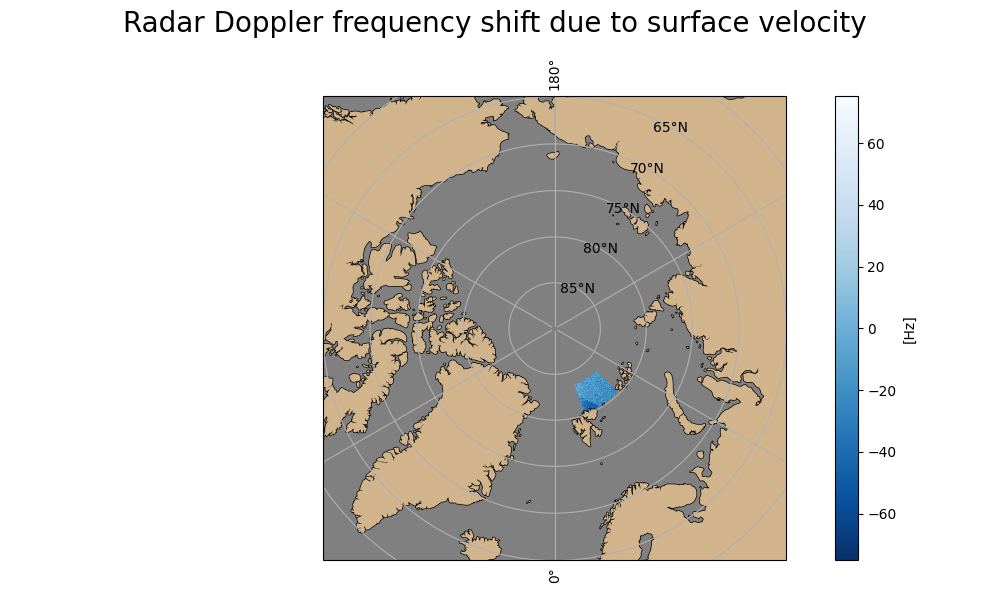

In [13]:
# The entire Arctic

ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_color = 'Blues_r',
                            map_start_longitude = -180,
                            map_end_longitude = 180,
                            map_edge_latitude = 65,    # Default 60
                            map_center_latitude = 90,  # Default 90
                            title_fontsize = 20        # Default 15
                            )

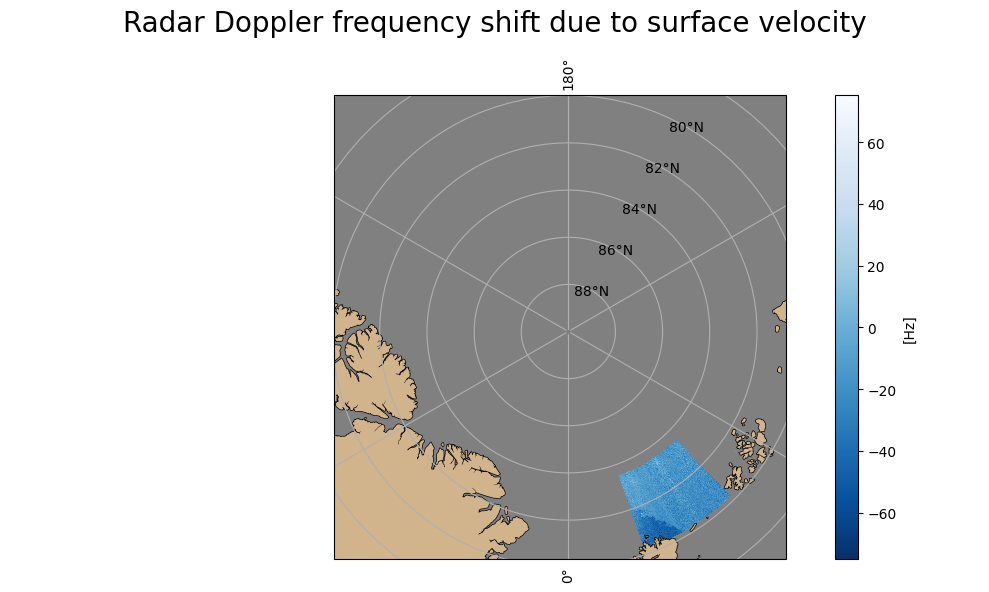

In [14]:
# Zooming in on the Arctic Ocean

ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_color = 'Blues_r',
                            map_start_longitude = -180,
                            map_end_longitude = 180,
                            map_edge_latitude = 80,    # Default 60
                            map_center_latitude = 90,  # Default 90
                            title_fontsize = 20        # Default 15
                            )

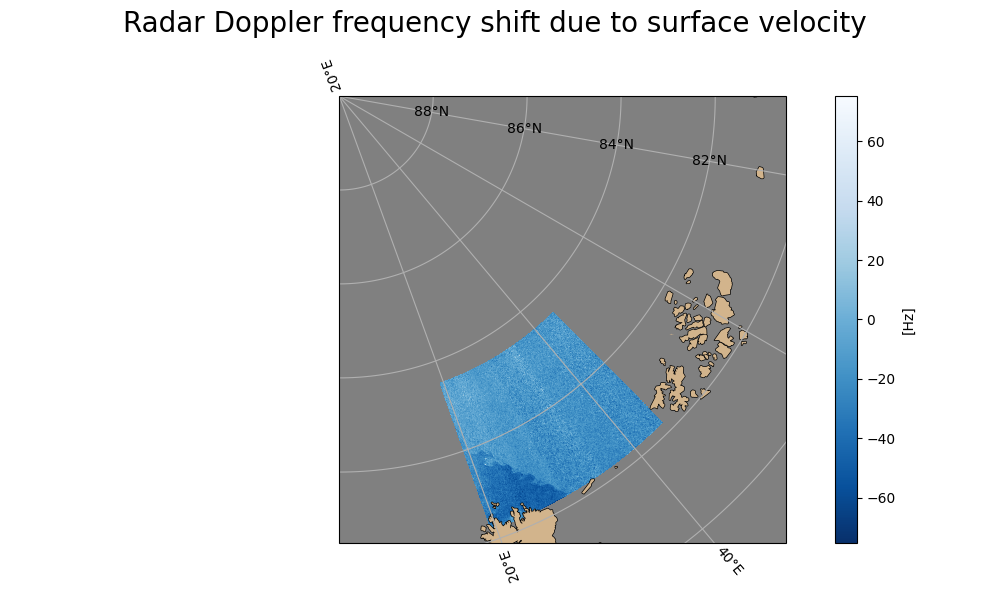

In [15]:
# A quarter of the sphere covering the Arctic Ocean

ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_color = 'Blues_r',
                            map_start_longitude = 0,
                            map_end_longitude = 90,    
                            map_center_latitude = 90,  # Default 90
                            map_edge_latitude = 80.5,  # Default 60
                            title_fontsize = 20        # Default 15
                            )

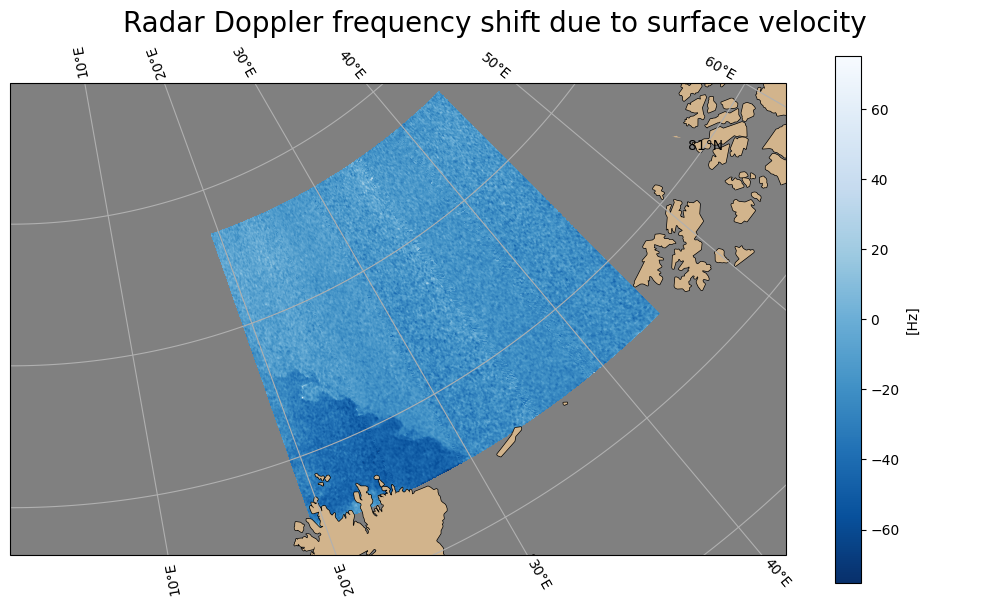

In [16]:
# Close up of the plotted variable

ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.geophysical_doppler,
                            map_color = 'Blues_r',
                            map_start_longitude = 0,
                            map_end_longitude = 60,    
                            map_center_latitude = 81,  # Default 90
                            map_edge_latitude = 80.5,    # Default 60
                            title_fontsize = 20        # Default 15
                            )

As an additional option, the plot below show that the selected variable, in this instance backscatter (sigma0), is attainable to plot on a log scale [dB] through setting the log_scale_option as True.

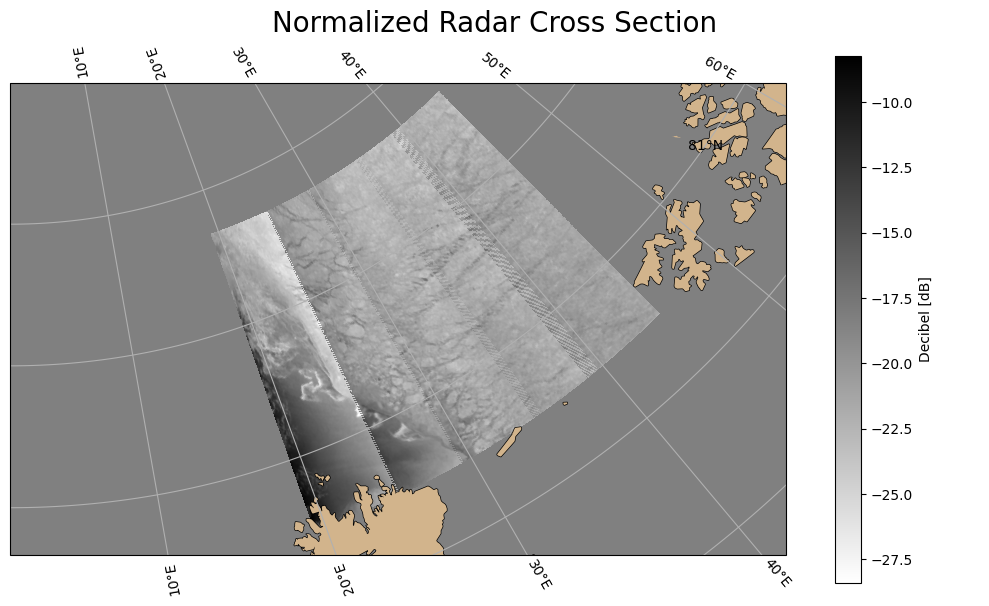

In [17]:
ArcticPlot_variables_on_a_map(dataset = ds_arctic,
                            variable = ds_arctic.sigma0,
                            map_color = 'gray_r',
                            map_start_longitude = 0,
                            map_end_longitude = 60,    
                            map_center_latitude = 81,  # Default 90
                            map_edge_latitude = 80.5,  # Default 60
                            title_fontsize = 20,       # Default 15
                            log_scale_option = True 
                            )